In [13]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
y_train = pd.read_csv("./data/y_train.csv")
print(y_train.shape)
print(y_train.head())

(3500, 2)
   cust_id  gender
0        0       0
1        1       0
2        2       1
3        3       1
4        4       0


In [6]:
x_train = pd.read_csv("./data/X_train.csv",encoding='CP949')
print(x_train.shape)
print(x_train.head(30))

(3500, 10)
    cust_id       총구매액      최대구매액        환불금액   주구매상품 주구매지점  내점일수    내점당구매건수  \
0         0   68282840   11264000   6860000.0      기타   강남점    19   3.894737   
1         1    2136000    2136000    300000.0     스포츠   잠실점     2   1.500000   
2         2    3197000    1639000         NaN  남성 캐주얼   관악점     2   2.000000   
3         3   16077620    4935000         NaN      기타   광주점    18   2.444444   
4         4   29050000   24000000         NaN      보석  본  점     2   1.500000   
5         5   11379000    9552000    462000.0    디자이너   일산점     3   1.666667   
6         6   10056000    7612000   4582000.0    시티웨어   강남점     5   2.400000   
7         7  514570080   27104000  29524000.0      명품  본  점    63   2.634921   
8         8  688243360  173088000         NaN      기타  본  점    18   5.944444   
9         9   26640850   13728000         NaN     농산물   대전점     1  12.000000   
10       10  245110760   67275000  22484000.0    디자이너  부산본점    25   2.120000   
11       11   24467500   1057

In [7]:
trainDf = pd.merge(y_train,x_train)

In [8]:
trainDf

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,0,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,1,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,1,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,0,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85
...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,1,3175200,3042900,NaN,골프,본 점,1,2.000000,1.000000,0
3496,3496,1,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40
3497,3497,0,75000,75000,NaN,주방용품,창원점,1,1.000000,0.000000,0
3498,3498,0,1875000,1000000,NaN,화장품,본 점,2,1.000000,0.000000,39


In [9]:
trainNAN = trainDf.isnull().sum()

In [10]:
trainNAN

cust_id       0
gender        0
총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

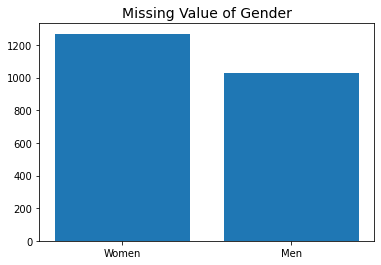

In [14]:
isnullGender = trainDf[trainDf['환불금액'].isnull()].gender.value_counts()

plt.bar(isnullGender.index,isnullGender.values)
plt.xticks([0,1],['Women','Men'])
plt.title("Missing Value of Gender",fontsize=14)
plt.show()